<a href="https://colab.research.google.com/github/mongbro/colab/blob/main/01_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  keras DNN으로 집값 예측하기

1. 패키지 수입 및 파라미터 설정

In [ ]:
# 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 파라미터
MY_HIDDEN = 1000
MY_EPOCH = 500      # 학습하는 횟수 => 0이면 학습을 안한다
pd.set_option('display.max_columns', None)

2. 데이터 처리

In [ ]:
#데이터 읽기
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing.csv')

# 데이터 샘플 10개 출력
print(raw.head(10))

# 데이터 통계 출력
print(raw.describe())


      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
5   5.

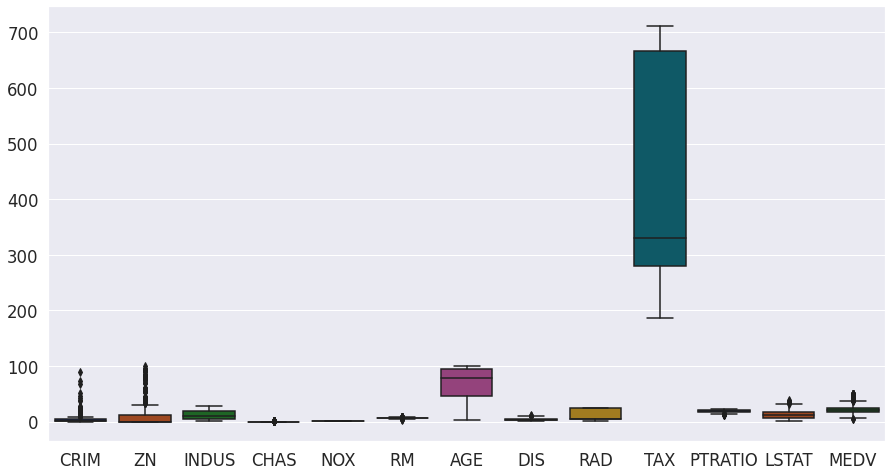

In [ ]:
plt.figure(figsize = (15, 8))
sns.set(font_scale = 1.5)
sns.boxplot(data = raw, palette = 'dark')

In [ ]:
# z-점수 정규화
scaler = StandardScaler()
z_data = scaler.fit_transform(raw)

# 데이터 형식 출력
print(type(raw))
print(type(z_data))

# numpy를 pandas롤 재전환
z_data = pd.DataFrame(z_data)
print(type(z_data))

# z-점수 정규화 된 데이터 샘플 출력 => 모든 데이터의 표준 편차는 1, 평균은 0으로 맞춰준다.
                                  # => 모든 요소들의 범위가 비슷해진다.
                                  # => 모든 요소들의 중요도를 비슷하게 맞춰준다.
                                  # => 표준 정규 분포(종 모양)

                                  # => z-정규화를 하지 않으면 학습을 아예 할 수 없음

print(z_data.head(10))
print(z_data.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
         0         1         2         3         4         5         6   \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

         7         8         9         10        11        12  
0  0.14021

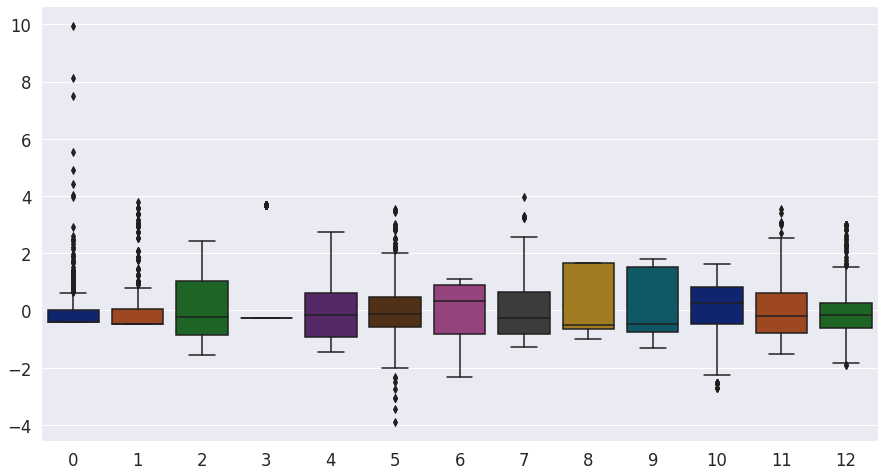

In [ ]:
plt.figure(figsize = (15, 8))
sns.set(font_scale = 1.5)
sns.boxplot(data = z_data, palette = 'dark')

In [ ]:
# 데이터 모양 출력
print(z_data.shape)

# 데이터를 입력(집값 이외의 속성)과 출력(집값)으로 분리
X_data = z_data.drop(12, axis = 1)    # 입력값
Y_data = z_data[12]                   # 출력값

# 데이터 모양 출력
print('분리 후')
print(X_data.shape)
print(Y_data.shape)

(506, 13)
분리 후
(506, 12)
(506,)


In [ ]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = 0.7)

# 최종 데이터 모양 출력
print('학습용 입력데이터 모양 :', X_train.shape)
print('학습용 출력데이터 모양 :', Y_train.shape)
print('평가용 입력데이터 모양 :', X_test.shape)
print('평가용 출력데이터 모양 :', Y_test.shape)

학습용 입력데이터 모양 : (354, 12)
학습용 출력데이터 모양 : (354,)
평가용 입력데이터 모양 : (152, 12)
평가용 출력데이터 모양 : (152,)


3. 인공신경망 구현

In [ ]:
model= Sequential()
input = X_train.shape[1]

# 입력층과 은닉층1 추가      # dense : 빽빽하게 => 12개 입력층이 각각 모든 은닉층과 연결된 상태
model.add(Dense(units = MY_HIDDEN / 2, # 은닉층1 갯수(1000개)
                input_dim = input, # 입력층 갯수(12개)
                activation = 'relu'))

# 은닉층2 추가
model.add(Dense(units = MY_HIDDEN / 2, activation = 'relu'))   # 은닉층2 갯수(1000개)

#출력층 추가
model.add(Dense(units = 1))    # 출력층 갯수(1개)

print('DNN 요약')
model.summary()

# 각 노드 : 뉴런                           뉴런끼리 연결된 선 : 시냅스
# 노드 안에서 연결된 시냅스 : 편향값(bias)

# dense_4 param = 13000 => 12 * 1000(입력층과 은닉층이 각각 연결된 모든 시냅스 수)
#                                   + 1000(뉴런 안에 있는 편향값 수)

#dense_5 param = 1001000 => 1000 * 1000(모든 시냅스 수) + 1000(뉴런 안에 있는 편향값 수)

#dense_6 param = 1001 => 1000 * 1(모든 시냅스 수) + 1(뉴런 안에 있는 편향값 수)

DNN 요약
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 500)               6500      
_________________________________________________________________
dense_80 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 501       
Total params: 257,501
Trainable params: 257,501
Non-trainable params: 0
_________________________________________________________________


4. 인공 신경망 학습

In [ ]:
# 학습 환경 설정
model.compile(optimizer = 'sgd', loss = 'mse')

print('학습 시작')
begin = time()

model.fit(x = X_train, y = Y_train, epochs = 300, verbose = 0)

end = time()
print('총 학습 시간 : {:.2f}초'.format(end - begin))

학습 시작
총 학습 시간 : 5.51초


5. 인공 신경망 평가

In [ ]:
# 신경망 평가
loss = model.evaluate(x = X_test, y = Y_test, verbose = 0)

print(type(X_test))
# print(X_test[0])  => 오류
# print(Y_test[0])  => 오류
print(X_test.iloc[0])
print(Y_test.iloc[0])

print('최종 손실값 : {:.2f}'.format(loss))
print('최종 손실값 : ', loss)





<class 'pandas.core.frame.DataFrame'>
0    -0.417172
1     0.714026
2     0.569516
3    -0.272599
4    -0.783454
5    -0.104904
6    -1.410862
7    -0.061390
8    -0.637962
9    -0.821030
10   -0.118149
11   -0.903149
Name: 93, dtype: float64
0.26852313623367563
최종 손실값 : 0.07
최종 손실값 :  0.07326699793338776


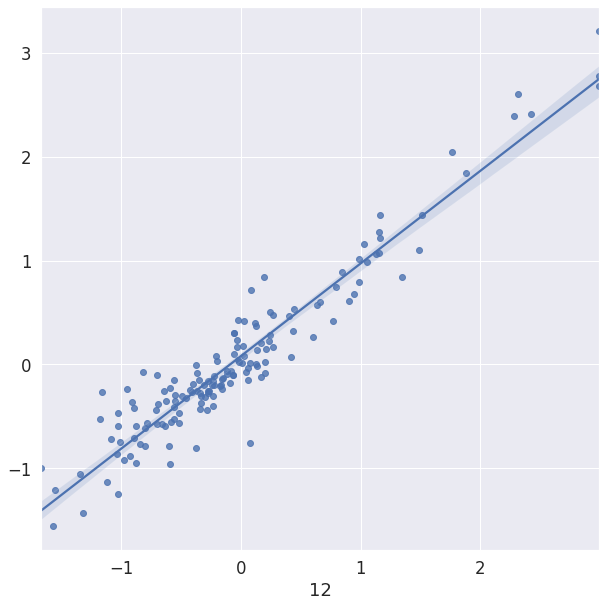

In [ ]:
# DNN으로 예측
pred = model.predict(x = X_test)
plt.figure(figsize = (10, 10))

sns.regplot(x = Y_test, y = pred)
# X축 : 정답    Y축 : 추측
# 정답과 추측이 거의 비슷하다.
# 0,2 근처에 있는 점을 예를들면
#       => 정답 : -0.1      추측 : 2.1
#       => 완벽하게 같지는 않다.

#### 결론 ####
#### 인공지능의 회귀문제를 풀때 ####
#### 인공신경망의 정확도를 시각화하기 위해서 ####
#### 산포도를 주로 사용한다 ####
